In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("hw5.ipynb")

# Classification: Detecting Breast Cancer — Classifying Tumors 🩺

Name: Soohoon Oh

Contact: 466273

Sources: from Washu CSE217a course materials


## 1. Predicting Breast Cancer
Now, we have a pretty good understanding of logistic regression for classification. So, let's turn to our actual application for _this week_: predicting whether a patient has breast cancer or not. First, let's take a quick look at the data from the University of Wisconsin. Each data point contains information about the breast cancer cells of a single patient derived from a digitized image of a fine needle aspirate (FNA) of breast mass, similar to these: 

![fine needle aspirate](utility/pics/fna.jpg)

Note that we do not have the image data, but the features capture the cell shapes and we also have the diagnosis (either `malignant` or `benign`), which we will treat as the class label.

### Understanding the Dataset

Let's take a look at what we have.

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
from sklearn.datasets import load_breast_cancer

cancer_data = load_breast_cancer()

<!-- BEGIN QUESTION -->

### Problem 1.1

First, let's explore `data`.

**Do this!** In the following cell, explore and profile the data by evaluating each of the fields in data that are related to features and targets (and their shapes), as well as the general description of the dataset.
> **Hint:** you can get the fields of the data object by entering `cancer_data.` and then pressing the tab key. 

In [5]:
cancer_data

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

**Write-up!** Just for safe-keeping, how many data points are there in this dataset? How many features? What are the names of the features? What are the names of the classes and how are they encoded in the labels?

In the dataset, there are 569 data points and 30 features. 
The names of the features are 'mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry' and 'worst fractal dimension'.
The names of the classes are 'malignant' and 'benign'.
In the labels, 'malignant' data are encoded as 0 and 'benign' data are encoded as 1. 

<!-- END QUESTION -->

### Problem 1.2

Now that we are familiar with what the data looks like, let's pull out what we need from it.

**Do this!** Pull out the input data `X` and class labels `y` from `data`. Make sure that the labels in `y` are either `+1` for `malignant` or `-1` for `benign` tumors.
> **Hint:** since we will be manipulating the target variable, use `copy()` to create true copies of the data and the target. 

In [6]:
X = cancer_data.data
y = cancer_data.target
y_val = np.zeros(y.shape)
y_val[y==0] = 1
y_val[y==1] = -1
y = y_val
...
n, d = X.shape
f'There are {n} data points with {d} features each.'

'There are 569 data points with 30 features each.'

In [7]:
grader.check("q1b")

q1b results: All test cases passed!

<!-- BEGIN QUESTION -->

### Problem 1.3

Let's plot the distribution of the classes in the dataset.

Plots configured! 📊
[357 212]
[-1.  1.]


Text(0.5, 1.0, 'Class Distribution - Breast Cancer Dataset')

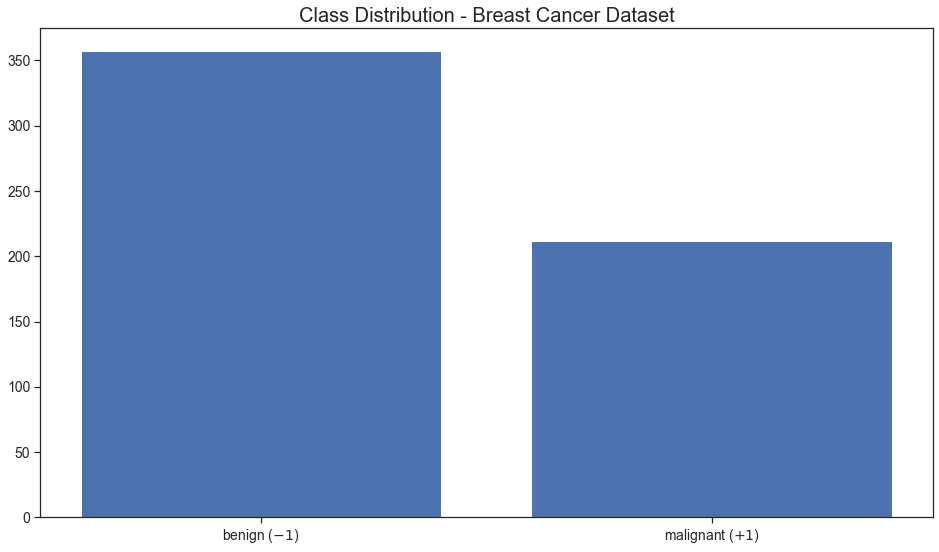

In [8]:
from utility.util import configure_plots

configure_plots()

classes, counts = np.unique(y, return_counts=True)

print(counts)
print(classes)

plt.bar(['benign ($-1$)', 'malignant ($+1$)'], counts)
plt.title('Class Distribution - Breast Cancer Dataset')

**Write-up!** What do you notice about the number of observations in each class? Could this potentially lead to problems for our modeling? Think about the data (specifically, the subsets of data) we use to train the data.

Based on the number of observations in each class, I can figure out there are more benign instances than malignant instances among the dataset. It means that the train data, the subset of data that is randomly selected from this data may also contain more benign data than malignant data. Training that biased data can make the model overfit to malignant data compared to benign data. So that it cannot generalize well on malignant data.

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

Before we train any model, we split our data into two or more subsets for training, validation, and testing. The [`train_test_split` 🔗](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) function provided by Scikit-Learn has a keyword argument called `stratify`.

**Write-up!** What does the `stratify` argument do according to the function's documentation? Why do we use `stratify` when creating our training and testing sets for this dataset? How would our evaluation of the model be affected if we did not use stratify?

According to the documentation, the stratify argument of train_test_split function declares the class labels used for splitting data in a stratified fashion. So having stratify argument other than none normalize the data. 
By using it, we can have the same proportion of malignant and benign data in the training data. 
If we do not stratify it, the model would be overfitting to malignant data, which prevent the model from well generalizing on malignant data.

<!-- END QUESTION -->

### Training the Logistic Regression Model

Now, you will train the classifier and then evaluate its performance. 

In the lab, we implemented Logistic Regression as described and formulated in class. In this series of problems, we will first review the model and practice building one with `sklearn`.

### Problem 1.4

First, we will begin by creating training and test sets with which we will build and evaluate our model with. Then, we will create a new instance of a `LogisticRegression` model and fit it with our training set. As we noticed in [Problem 1.3](#Problem-1.3), our dataset does not have a balanced class distribution. We will need to handle this accordingly.

**Do this!** In the following cell, you should do the following:
1. Create a train/test split with `train_test_split` with a `test_size` of 0.3, stratification by `y` with `stratify`, and a `random_state` of 4.
2. Create a new `LogisticRegression` model with the `'liblinear'` `solver` and `fit` it with the training set and stores it in `linear_model`.
3. Evaluate the performance by manually computing and printing the classification _accuracy_ of your trained model on the test set.

> **Hint**: Feel free to refer to any official documentation and remember that you can easily view the documentation in your notebook for any function or object by adding a `?` after its name (eg. `train_test_split?`).

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3, stratify = y, random_state=4)

linear_model = LogisticRegression(solver = 'liblinear')
linear_model.fit(X_train, y_train)
y_pred=linear_model.predict(X_test)

accuracy = np.mean(y_test==y_pred)
f'accuracy: {accuracy:0.2%}'

'accuracy: 90.64%'

In [10]:
grader.check("q1d")

q1d results: All test cases passed!

## 2. Diving Deeper into Classification Error

While our model's accuracy was pretty good, let's analyze this accuracy more closely. For classification problems we can, instead of just counting mistakes, look at what kind of mistakes we made.

<!-- BEGIN QUESTION -->

### Problem 2.1

**Write-up!** What are the two different kinds of mistakes we can make for breast cancer diagnosis? Discuss them briefly.
> **Hint:** Answer this question in terms of the application; do **not** simply state the terms from the confusion matix. 

There are two cases of mistakes.
One case is false positive case, the case when the tumor is diagonized to be malignant but actually it is benign.
The other case is false negative case, when the tumor is diagonized to be benign but actually it is malignant. 

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

**Write-up!** Again, in the context of the application of classifying tumors as either malignant or benign, should we care to distinguish between the two kinds of mistakes? Explain why or why not? 
If yes, is there one type of mistake we prefer over the other? If so, which one and why?

In that context, the two kinds of mistakes should be distinguished. 
Because, for the false positive cases when the benign tumor was misinterpretted as a malignant one, the impact of misprediction doesn't directly affect the patients' health. but the false negative cases when a malignant tumor was misundestood to be a benign one can make fatal trouble in patient's health. 
Thus, to choose one, the false positive mistake is better than the other mistake. 
we should distinguish those two kinds of mistake and excessively be more cautious about the worse cases. 

<!-- END QUESTION -->

### Confusion Matrices

A [confusion matrix](https://en.wikipedia.org/wiki/Confusion_matrix), sometimes called an error matrix, helps us summarize and understand the performance of our classification models by presenting the different types of correct and incorrect predictions our model is making: true positives, true negatives, false positives, and false negatives.

<img src="utility/pics/confusion_matrix.png" alt="Drawing" style="width: 350px;"/>

<!-- BEGIN QUESTION -->

### Problem 2.2

**Do this!** In the following cell, use `confusion_matrix` from `sklearn.metrics` to compute the confusion matrix for the model you built in [Problem 1.4](#Problem-1.4). Then, use `plot_confusion_matrix` to visualize the matrix (you will need to specify the `labels` to use). 
> **Hint:** Again, feel free to refer to any official documentation and remember that you can easily view the documentation for a function or object by adding a `?` after its name (e.g. `confusion_matrix?`).

C:\Users\SoohoonDev\Desktop\CSE217\hw5-osh0807\utility\util.py:104: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.text(j, i, format(confusion_matrix[i, j], fmt), FontSize='15', horizontalalignment="center", color="white" if confusion_matrix[i, j] > thresh else "black")


Ellipsis

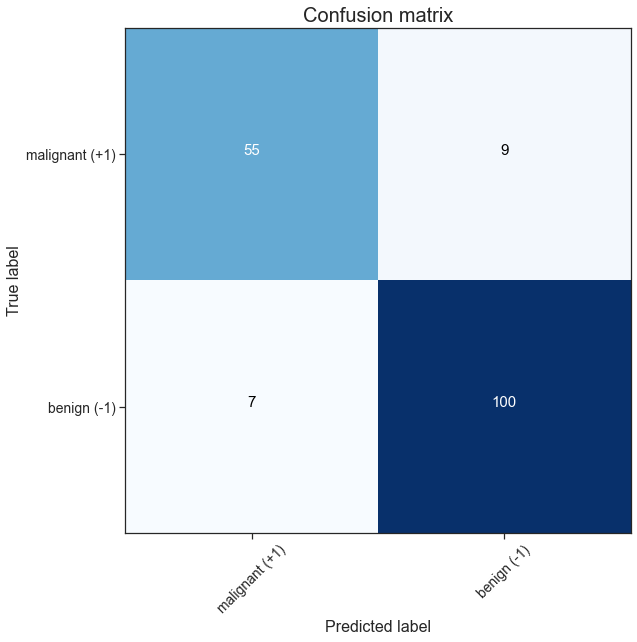

In [11]:
from sklearn.metrics import confusion_matrix
from utility.util import plot_confusion_matrix

m = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(m,labels = ['malignant (+1)', 'benign (-1)'])


...

<!-- END QUESTION -->

### Experiment: Making Decisions

Now, let's take a look at decision boundaries. As we mentioned in both lecture and lab, label predictions (eg. $\hat{y} = +1$) are made by considering the class probabilities $P(y = +1 \mid x)$ produced by our model with a decision threshold. Typically, we use a threshold of 0.5 such that $\hat{y} = +1$ if $P(y = +1 \mid x) > 0.5$. However, as we hinted in [Problem 2.1](#Problem-2.1), there are situations and contexts in which the cost of making a _false positive_ error is different than making a _false negative_ error. We can account for cost differences by adjusting the threshold, and therefore the decision boundary, of our classifier.

In the following few cells, we will prepare an experiment to test and observe the effects of changing the decision threshold of our classification model.

### Problem 2.3

The first thing we will need to prepare is a way to compute the predictions of a model given a threshold. This is because `sklearn` does not offer an option to do this.

**Do this!** Complete the `make_predictions` function so that it computes the predicted labels `y_pred` $\in [-1, 1]$ for data `X_test` with a given `model` and decision `threshold`. 
> **Hint:** You may find the `model.predict_proba` method and [this StackOverflow thread](https://stackoverflow.com/questions/30820962/splitting-columns-of-a-numpy-array-easily) to be helpful.

In [12]:
def make_predictions(model, X_test, threshold=0.5):
    '''
    Computes the predicted labels for points in X_TEST using a given MODEL and THRESHOLD
    '''
    N = X_test.shape[0]
    y_pred = np.ones(N)
    y_pred[np.where(model.predict_proba(X_test)[:,1] <= threshold)] = -1


    return y_pred


In [13]:
grader.check("q2c")

q2c results: All test cases passed!

<!-- BEGIN QUESTION -->

### Problem 2.4

Next, we will combine all of the things we have done in earlier problems into a single function that produces a confusion matrix plot by fitting and evaluating new Logisitic Regression models with varying thresholds. Note that there will be some redundancy/inefficiency in this function because it repeatedly recomputes the same values, but it is okay as it simplifies the code.

**Do this!** Complete the `boundary_experiment` function so that it does the following:
1. Creates a train/test split with `train_test_split` with a `test_size` of 0.3, stratification by `y` with `stratify`, and a `random_state` of 11.
2. Creates a new `LogisticRegression` model with the `'liblinear'` `solver` and `fit` it with the training set.
3. Makes predictions `y_pred` for test set points using `make_predictions` and `threshold`.
4. Computes a confusion matrix, but instead of getting FP, FN, TP, and TN, we want the false positive rate (FPR), false negative rate (FNR), true positive rate (TPR), and true negative rate (TNR). This will help in decision making since the classes in our dataset are unbalanced.  **Hint:** provide `normalize='true'` as an arguemnt. 
5. Plots the confusion matrix using `plot_confusion_matrix`.

> **Hint:** Feel free to refer to any official documentation and remember that you can easily view the documentation for a function or object by adding a `?` after its name (eg. `plot_confusion_matrix?`).

In [14]:
def boundary_experiment(X, y, threshold=0.5):
    X_test, X_train, y_test, y_train = train_test_split(X,y,test_size=0.3, stratify=y, random_state=11)
    model = LogisticRegression(solver='liblinear')
    fitModel = model.fit(X_train, y_train)
    y_pred = make_predictions(fitModel, X_test, threshold=threshold)
    m = confusion_matrix(y_test, y_pred, normalize ='true')
    plot_confusion_matrix(m,labels = ['malignant (+1)', 'benign (-1)'])

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### Problem 2.5

In the following cell, we will experiment with how changing the decision boundary (threshold) affects the confusion matrix using the functions that you implemented earlier. In order to make the visualization work you will need to install an additional package, `ipywidgets`.

#### Jupyter Notebook or Anaconda
If you are using Jupyter Notebook or Anaconda, then run the cell below.

In [15]:
! pip show ipywidgets

Name: ipywidgets
Version: 7.6.3
Summary: IPython HTML widgets for Jupyter
Home-page: http://ipython.org
Author: IPython Development Team
Author-email: ipython-dev@scipy.org
License: BSD
Location: c:\users\soohoondev\.conda\envs\cse217a\lib\site-packages
Requires: traitlets, ipykernel, ipython, widgetsnbextension, nbformat, jupyterlab-widgets
Required-by: jupyter


If the cell above contains a version number, then skip the cell below and move to **Do this!**. Otherwise, run the cell below to install the ``ipywidgets`` package.

In [16]:
! pip install ipywidgets

**Do this!** Evaluate the following cell and experiment with the slider.

In [15]:
from ipywidgets import interactive, fixed

interactive(boundary_experiment, X=fixed(X), y=fixed(y), threshold=(0, 1, 0.05))

interactive(children=(FloatSlider(value=0.5, description='threshold', max=1.0, step=0.05), Output()), _dom_cla…

**Write-up!** How does changing the threshold affect the confusion matrix (e.g. correct classification rates and error rates)? What is the smallest threshold, if any, that eliminates false positive errors? What is the largest threshold, if any, that eliminates false negative errors? Which of the two scenarios would be preferable, if any?

As the threshold increases, The portion of cases predicted to be benign increases and so does the portion of false negative cases. 
and when the threshold decreases, the portion of cases predicted to be malignant increases and so does the portion of false positive.
For my cases, there were no threshold that eliminates false positive or false negative errors other than 0 or 1.
But there have to be ones that eliminates each false positive cases or false negative cases because there should be some points that includes or excludes all the data based on the threshold I heard that the problem is on a localized random state condition of my computer.
If I manipulated the unit of threshold and have the points that eliminates either false negative or false poistive errors, I would choose the threshold that eliminates false negative cases, because false negative cases give much worse problem than the false positive cases. 

---

To double-check your work, the cell below will rerun all of the autograder tests.

In [16]:
grader.check_all()

q1b results: All test cases passed!

q1d results: All test cases passed!

q2bii results: All test cases passed!

q2c results: All test cases passed!

## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

In [17]:
# Save your notebook first, then run this cell to export your submission.
grader.export(pdf=False)